# Retail Sales Analysis

### Part 1: Data Preparation (Using Pandas)

In [42]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

1. Download and use the Retail Dataset from Kaggle
2. Clean and merge the data:
    - Handle missing values
    - Remove duplicate or canceled orders
    - Create columns like `TotalPrice = Quantity * UnitPrice`
3. Export cleaned data to a CSV.

In [43]:
df = pd.read_csv('Retail Sales Improved.csv')

In [44]:
df.head()

,Transaction ID,Date,Customer ID,Country,Gender,Age,Product Category,Quantity,Price per Unit,Order Status
0,1,1/1/2022,CUST001,Taiwan,Male,53,Electronics,7,127,Completed
1,2,1/2/2022,CUST002,Indonesia,Female,38,Beauty,4,117,Completed
2,3,1/3/2022,CUST003,Philippines,Male,32,Clothing,13,39,Completed
3,4,1/4/2022,CUST004,Malaysia,Female,45,Clothing,15,131,Completed
4,5,1/5/2022,CUST005,Poland,Female,48,Electronics,11,96,Completed


In [45]:
df.shape

(1000, 10)

# Handling the Missing value

In [46]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Country             0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Order Status        0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Country           1000 non-null   object
 4   Gender            1000 non-null   object
 5   Age               1000 non-null   int64 
 6   Product Category  1000 non-null   object
 7   Quantity          1000 non-null   int64 
 8   Price per Unit    1000 non-null   int64 
 9   Order Status      1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [48]:
df.describe(include='all')

,Transaction ID,Date,Customer ID,Country,Gender,Age,Product Category,Quantity,Price per Unit,Order Status
count,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000.000000,1000.000000,1000
unique,NaN,1000,1000,20,2,NaN,3,NaN,NaN,2
top,NaN,1/1/2022,CUST001,Brazil,Male,NaN,Beauty,NaN,NaN,Completed
freq,NaN,1,1,67,519,NaN,382,NaN,NaN,928
mean,500.500000,NaN,NaN,NaN,NaN,41.194000,NaN,7.919000,101.746000,NaN
std,288.819436,NaN,NaN,NaN,NaN,13.644799,NaN,4.349409,44.256866,NaN
min,1.000000,NaN,NaN,NaN,NaN,18.000000,NaN,1.000000,25.000000,NaN
25%,250.750000,NaN,NaN,NaN,NaN,29.000000,NaN,4.000000,63.000000,NaN
50%,500.500000,NaN,NaN,NaN,NaN,41.000000,NaN,8.000000,103.000000,NaN
75%,750.250000,NaN,NaN,NaN,NaN,53.000000,NaN,12.000000,140.000000,NaN


In [49]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.194000,7.919000,101.746000
std,288.819436,13.644799,4.349409,44.256866
min,1.000000,18.000000,1.000000,25.000000
25%,250.750000,29.000000,4.000000,63.000000
50%,500.500000,41.000000,8.000000,103.000000
75%,750.250000,53.000000,12.000000,140.000000
max,1000.000000,64.000000,15.000000,175.000000


In [50]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Country           1000 non-null   object        
 4   Gender            1000 non-null   object        
 5   Age               1000 non-null   int64         
 6   Product Category  1000 non-null   object        
 7   Quantity          1000 non-null   int64         
 8   Price per Unit    1000 non-null   int64         
 9   Order Status      1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [52]:
df.duplicated().sum()

0

In [53]:
df['Order Status'].value_counts()

Order Status
Completed    928
Cancelled     72
Name: count, dtype: int64

In [54]:
df_cleaned = df[df['Order Status'].str.lower()!='cancelled']

In [55]:
df_cleaned.shape

(928, 10)

In [56]:
df_cleaned.head()

,Transaction ID,Date,Customer ID,Country,Gender,Age,Product Category,Quantity,Price per Unit,Order Status
0,1,2022-01-01,CUST001,Taiwan,Male,53,Electronics,7,127,Completed
1,2,2022-01-02,CUST002,Indonesia,Female,38,Beauty,4,117,Completed
2,3,2022-01-03,CUST003,Philippines,Male,32,Clothing,13,39,Completed
3,4,2022-01-04,CUST004,Malaysia,Female,45,Clothing,15,131,Completed
4,5,2022-01-05,CUST005,Poland,Female,48,Electronics,11,96,Completed


In [57]:
df_cleaned['Total Price'] = df['Quantity']*df['Price per Unit']

In [58]:
df_cleaned.head()

,Transaction ID,Date,Customer ID,Country,Gender,Age,Product Category,Quantity,Price per Unit,Order Status,Total Price
0,1,2022-01-01,CUST001,Taiwan,Male,53,Electronics,7,127,Completed,889
1,2,2022-01-02,CUST002,Indonesia,Female,38,Beauty,4,117,Completed,468
2,3,2022-01-03,CUST003,Philippines,Male,32,Clothing,13,39,Completed,507
3,4,2022-01-04,CUST004,Malaysia,Female,45,Clothing,15,131,Completed,1965
4,5,2022-01-05,CUST005,Poland,Female,48,Electronics,11,96,Completed,1056


In [59]:
df_cleaned.to_csv('Retail Data Cl.csv')

## Part 3: EDA & Visualization

### Time series line plot: Monthly sales trend

In [69]:
retailDf= pd.read_csv('Retail Data Cl.csv')

In [70]:
retailDf['Date'] = pd.to_datetime(retailDf['Date'])
retailDf['Month'] = retailDf['Date'].dt.to_period('M')
monthly_sales = retailDf.groupby('Month')['Total Price'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

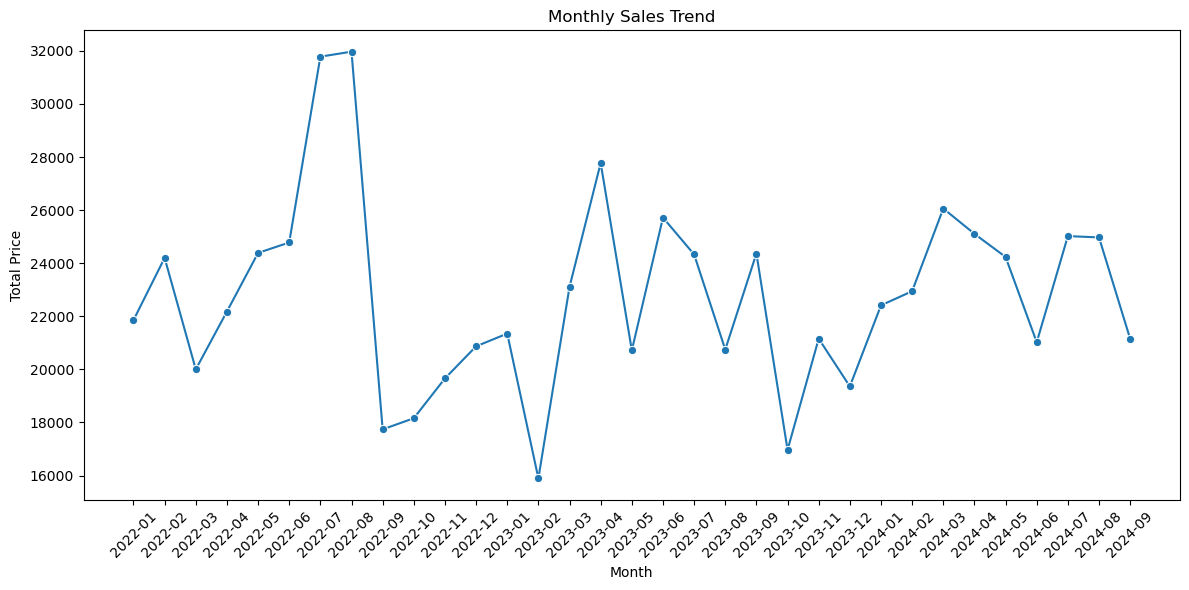

In [71]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Price', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bar chart: Top countries by revenue

In [72]:
top_countries = retailDf.groupby('Country')['Total Price'].sum().sort_values(ascending=False).head(10).reset_index()

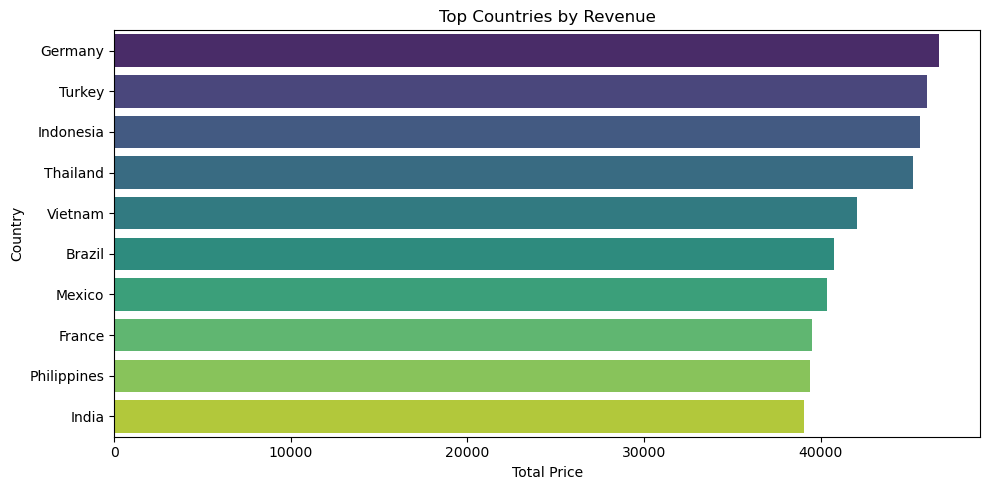

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_countries, x='Total Price', y='Country', palette='viridis')
plt.title('Top Countries by Revenue')
plt.tight_layout()
plt.show()

### Pie chart: Contribution of top 5 customers

In [74]:
top_customers = retailDf.groupby('Customer ID')['Total Price'].sum().sort_values(ascending=False).head(5)

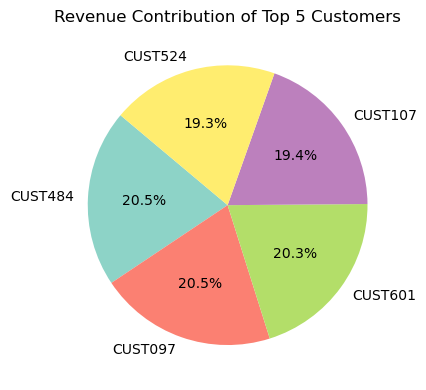

In [75]:
plt.figure(figsize=(8,4))
top_customers.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Revenue Contribution of Top 5 Customers')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Heatmap: Sales by month and country

In [76]:
retailDf['Date'] = pd.to_datetime(retailDf['Date'])
retailDf['Month'] = retailDf['Date'].dt.strftime('%b')
monthly_country_sales = retailDf.groupby(['Month', 'Country'])['Total Price'].sum().unstack(fill_value=0)

In [77]:
monthly_country_sales

Country,Bangladesh,Brazil,China,France,Germany,India,Indonesia,Italy,Japan,Malaysia,Mexico,Philippines,Poland,South Korea,Taiwan,Thailand,Turkey,USA,United Kingdom,Vietnam
Month,,,,,,,,,,,,,,,,,,,,
Apr,3640,9008,1277,2055,4191,2460,5013,4758,2308,2339,6612,2592,3316,0,765,2899,11798,1136,5021,3872
Aug,5204,5090,1296,6405,1973,5070,6057,1920,1794,2791,3376,9553,3429,6935,2529,1476,5789,3988,3010,0
Dec,1883,708,2174,1139,2280,2657,1645,1458,3224,1474,4302,276,2584,3663,1183,4056,672,372,2994,1484
Feb,3850,714,2611,4037,5655,2416,3458,5389,1186,1349,883,2862,2609,5725,2439,5010,180,1860,1790,9016
Jan,3876,4317,4553,4308,3884,2879,2115,1612,1022,2888,3047,2816,4236,1839,3272,2056,4368,4543,6553,1431
Jul,4746,2567,1176,4355,13678,3007,3316,1682,4128,2633,5553,4757,4294,2332,1156,4884,4186,3667,7751,1263
Jun,3071,974,2048,1575,4909,2594,12663,3421,666,1137,1648,5287,6024,1319,2246,7386,4517,6122,1536,2377
Mar,3133,6746,1256,3858,3369,5000,3375,9458,1237,3441,1910,5486,2890,2373,685,1235,4990,4444,0,4284
May,1772,3083,3117,0,1188,4173,4053,1611,1328,2640,4791,866,4127,4301,4715,2995,5649,5805,399,12725


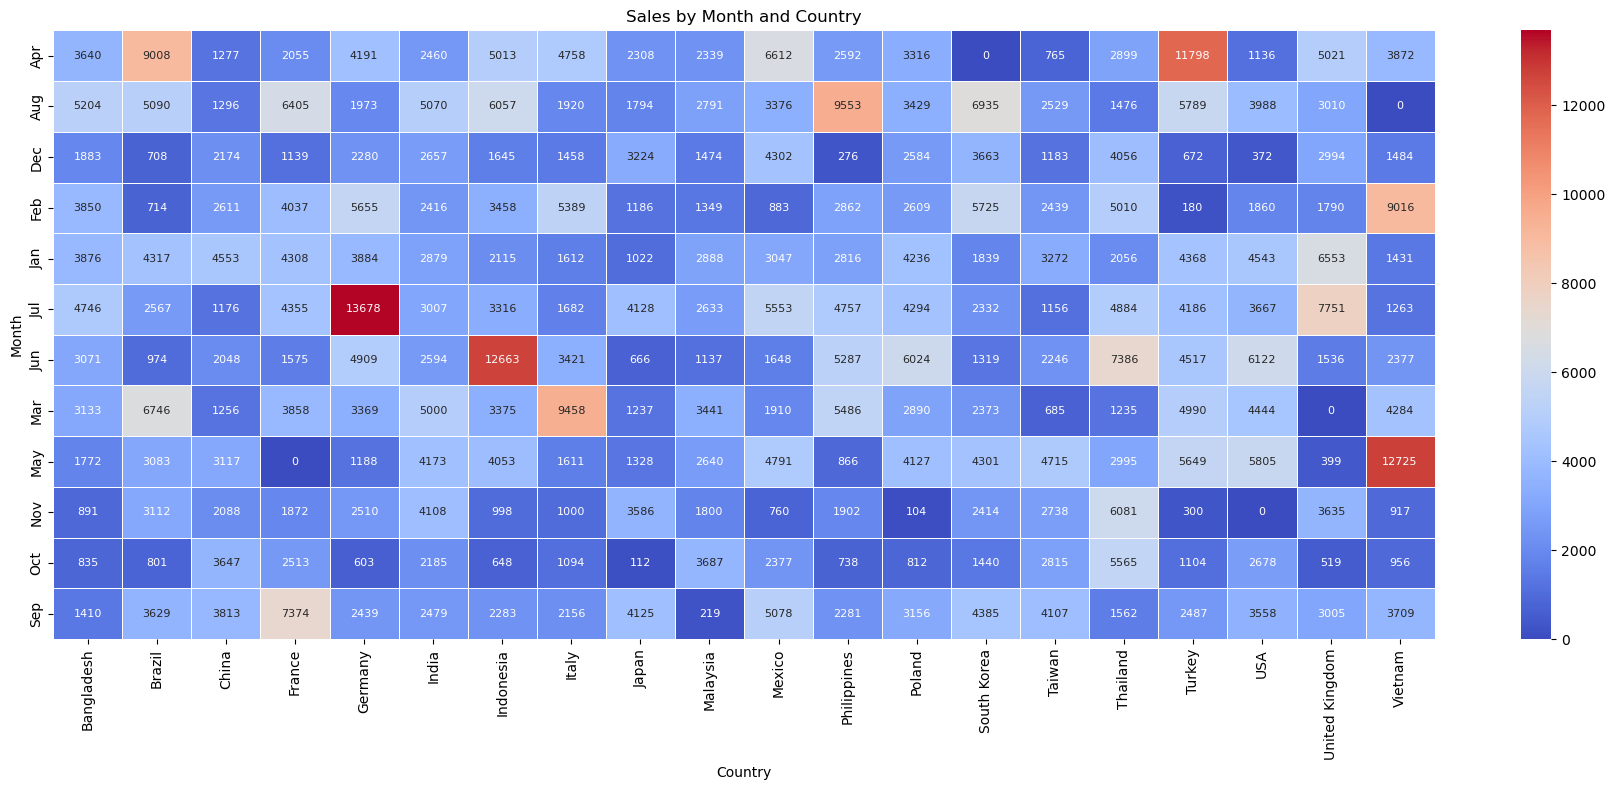

In [78]:
import matplotlib.ticker as mticker

plt.figure(figsize=(18,8))
sns.heatmap(
    monthly_country_sales,
    cmap='coolwarm',
    linewidths=0.5,
    annot=True,
    fmt='.0f',             
    annot_kws={"size": 8}
)
plt.title('Sales by Month and Country')
plt.xlabel('Country')
plt.ylabel('Month')


plt.tight_layout()
plt.show()